In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading Data


In [2]:
df= pd.read_csv("Business Analyst -ABC University (1).csv")

In [3]:
print(df.keys())

Index(['Name', 'Mobile', 'Lead Origin', 'Country', 'State', 'City', 'Instance',
       'Instance Date', 'Campaign', 'Lead Stage', 'Lead Status',
       'Email Verification Status', 'Mobile Verification Status',
       'Registration Device', 'Course', 'Specialization', 'Campus',
       'Last Lead Activity Date', 'Form Initiated', 'Paid Applications',
       'Submitted Applications', 'Enrolment Status'],
      dtype='object')


In [4]:
df.head()

,Name,Mobile,Lead Origin,Country,State,City,Instance,Instance Date,Campaign,Lead Stage,...,Mobile Verification Status,Registration Device,Course,Specialization,Campus,Last Lead Activity Date,Form Initiated,Paid Applications,Submitted Applications,Enrolment Status
0,Ram Yadav,9830******,API,India,West Bengal,Kolkata,Primary,09-10-2023,Meta/85/API,Untouched,...,No,NaN,B.Tech in Biomedical Engineering,Specialization Not Available,UG,09-10-2023 11:26,0,0,0,No
1,Anamika Bairagi,7439******,API,India,West Bengal,Barasat,Primary,09-10-2023,Meta/84/API,Disqualified,...,No,NaN,"BCA (Hons) in Banking, Financial Services and ...",Specialization Not Available,UG,09-10-2023 11:20,0,0,0,No
2,Puja Singh,7003******,API,India,West Bengal,Kolkata,Primary,09-10-2023,Meta/85/API,No Response,...,No,NaN,"MBA (Human Resource, Marketing, Finance)",Specialization Not Available,PG,09-10-2023 10:17,0,0,0,No
3,Jhuma Haldar,9831******,API,India,West Bengal,Kolkata,Primary,09-10-2023,Meta/88/API,Disqualified,...,No,NaN,M.A in Public Policy,Specialization Not Available,PG,09-10-2023 10:16,0,0,0,No
4,Rajan Kumar,9128******,API,India,West Bengal,Kolkata,Primary,09-10-2023,Meta/85/API,Disqualified,...,No,NaN,B.Com (H),Specialization Not Available,UG,09-10-2023 08:14,0,0,0,No


# Data Exploration and Pre-Processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31604 entries, 0 to 31603
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name                        31604 non-null  object
 1   Mobile                      31604 non-null  object
 2   Lead Origin                 31604 non-null  object
 3   Country                     31604 non-null  object
 4   State                       31604 non-null  object
 5   City                        31604 non-null  object
 6   Instance                    31604 non-null  object
 7   Instance Date               31604 non-null  object
 8   Campaign                    31604 non-null  object
 9   Lead Stage                  31604 non-null  object
 10  Lead Status                 31604 non-null  object
 11  Email Verification Status   31604 non-null  object
 12  Mobile Verification Status  31604 non-null  object
 13  Registration Device         692 non-null    ob

In [6]:
df.isnull().sum()

Name                              0
Mobile                            0
Lead Origin                       0
Country                           0
State                             0
City                              0
Instance                          0
Instance Date                     0
Campaign                          0
Lead Stage                        0
Lead Status                       0
Email Verification Status         0
Mobile Verification Status        0
Registration Device           30912
Course                            0
Specialization                    0
Campus                            0
Last Lead Activity Date           0
Form Initiated                    0
Paid Applications                 0
Submitted Applications            0
Enrolment Status                  0
dtype: int64

In [7]:
df.isnull().sum()*100/len(df)

Name                           0.000000
Mobile                         0.000000
Lead Origin                    0.000000
Country                        0.000000
State                          0.000000
City                           0.000000
Instance                       0.000000
Instance Date                  0.000000
Campaign                       0.000000
Lead Stage                     0.000000
Lead Status                    0.000000
Email Verification Status      0.000000
Mobile Verification Status     0.000000
Registration Device           97.810404
Course                         0.000000
Specialization                 0.000000
Campus                         0.000000
Last Lead Activity Date        0.000000
Form Initiated                 0.000000
Paid Applications              0.000000
Submitted Applications         0.000000
Enrolment Status               0.000000
dtype: float64

In [8]:
df['Registration Device'] = df['Registration Device'].fillna(df['Registration Device'].mode()[0])

In [9]:
df.isnull().any()

Name                          False
Mobile                        False
Lead Origin                   False
Country                       False
State                         False
City                          False
Instance                      False
Instance Date                 False
Campaign                      False
Lead Stage                    False
Lead Status                   False
Email Verification Status     False
Mobile Verification Status    False
Registration Device           False
Course                        False
Specialization                False
Campus                        False
Last Lead Activity Date       False
Form Initiated                False
Paid Applications             False
Submitted Applications        False
Enrolment Status              False
dtype: bool

In [10]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature =[ feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("numerical features count {}".format(len(numerical_feature)))
print("discrete features count {}".format(len(discrete_feature)))
print("continuous feature count {}".format(len(continuous_feature)))
print("categorical feature count {}".format(len(categorical_feature)))

numerical features count 3
discrete features count 3
continuous feature count 0
categorical feature count 19


In [11]:
categorical_feature

['Name',
 'Mobile',
 'Lead Origin',
 'Country',
 'State',
 'City',
 'Instance',
 'Instance Date',
 'Campaign',
 'Lead Stage',
 'Lead Status',
 'Email Verification Status',
 'Mobile Verification Status',
 'Registration Device',
 'Course',
 'Specialization',
 'Campus',
 'Last Lead Activity Date',
 'Enrolment Status']

In [12]:
numerical_feature

['Form Initiated', 'Paid Applications', 'Submitted Applications']

In [13]:
df.duplicated().sum()

0

In [14]:
df['Name'].value_counts()

Sneha Das            16
Shreya Das           14
Ankita Das           13
Sayan Das            11
Rahul                11
                     ..
Anik Ghoshal          1
Somprakash Bhunia     1
Eshita sen            1
Abhirup das           1
Virat                 1
Name: Name, Length: 28712, dtype: int64

In [15]:
df.Name.unique()

array(['Ram Yadav', 'Anamika Bairagi', 'Puja Singh', ...,
       'ROHIN DAS SHEKH', 'Reena Das Debnath', 'Virat'], dtype=object)

In [16]:
df.describe()

,Form Initiated,Paid Applications,Submitted Applications
count,31604.000000,31604.000000,31604.000000
mean,0.040564,0.013543,0.013479
std,0.199198,0.115584,0.115317
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000


In [17]:
df.shape

(31604, 22)

In [18]:
df.size

695288

In [19]:
df.dtypes

Name                          object
Mobile                        object
Lead Origin                   object
Country                       object
State                         object
City                          object
Instance                      object
Instance Date                 object
Campaign                      object
Lead Stage                    object
Lead Status                   object
Email Verification Status     object
Mobile Verification Status    object
Registration Device           object
Course                        object
Specialization                object
Campus                        object
Last Lead Activity Date       object
Form Initiated                 int64
Paid Applications              int64
Submitted Applications         int64
Enrolment Status              object
dtype: object

# Data Visualization

<Axes: >

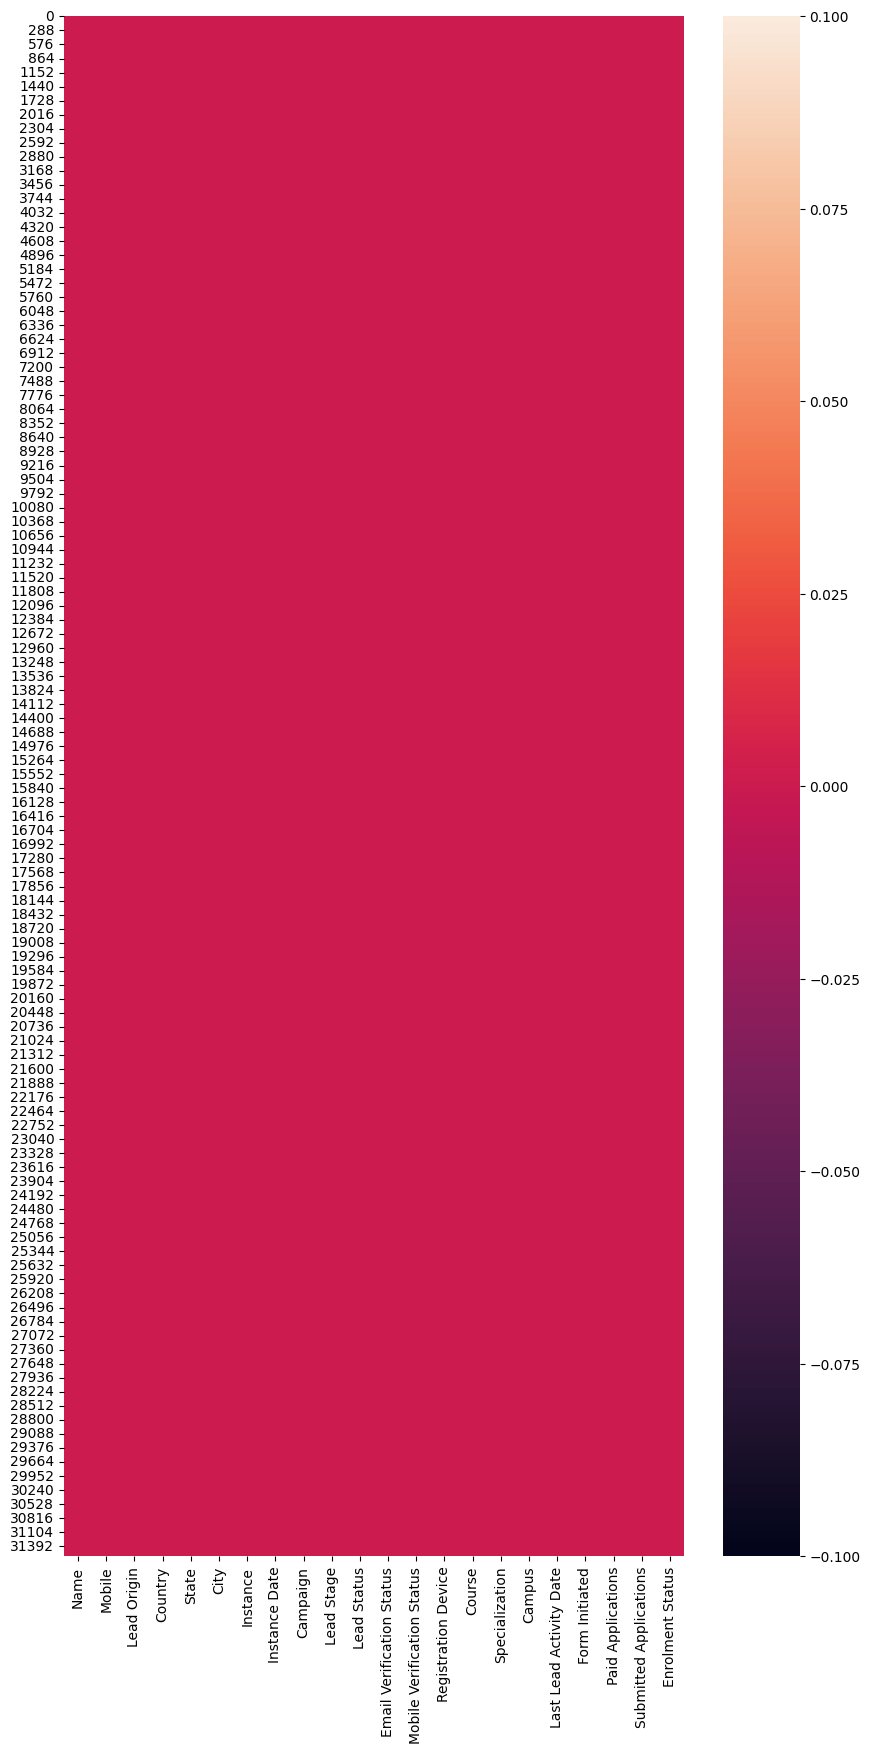

In [20]:
plt.figure(figsize=(10,20))
sns.heatmap(df.isnull()) 

In [21]:
# No null value in our dataset

In [22]:
#Strength of students enrolled in different pprogrammes offered by the institute 

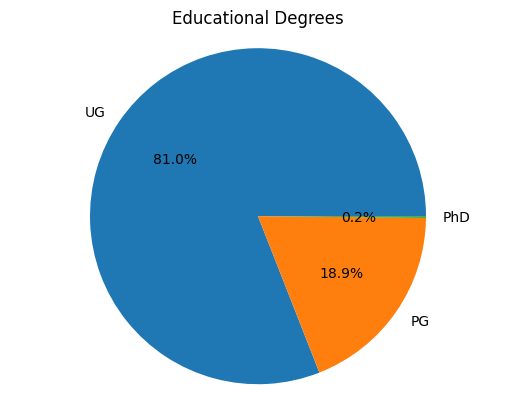

In [23]:
labels = ['UG','PG','PhD']
sizes=[25585,5968,51]
fig,ax= plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Educational Degrees')
plt.show()

In [24]:
df['Campus'].value_counts() 

UG     25585
PG      5968
PhD       51
Name: Campus, dtype: int64

In [25]:
df['Enrolment Status'].value_counts()

No     31469
Yes      135
Name: Enrolment Status, dtype: int64

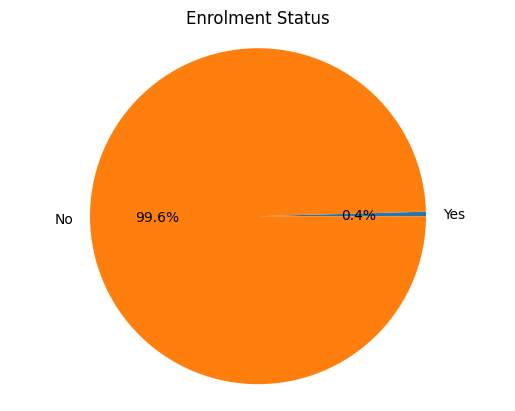

In [26]:
labels = ['Yes','No']
sizes=[135,31469]
fig,ax= plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Enrolment Status')
plt.show()

In [27]:
#Seat availability in diffferent specializations offered by the university 

In [28]:
df['Specialization'].value_counts()

Specialization Not Available                           28770
School of Engineering and Technology (SOET)              722
School of Liberal Arts and Culture Studies (SOLACS)      501
School of Business and Economics (SOBE)                  395
School of Life Science and Biotechnology (SOLB)          268
School of Medical Sciences (SOMS)                        264
School of Basic and Applied Sciences (SOBAS)             249
School of Education (SOE)                                150
School of Media and Communication (SOMC)                 125
School of Law and Justice (SOLJ)                         115
School of Smart Agriculture                               45
Name: Specialization, dtype: int64

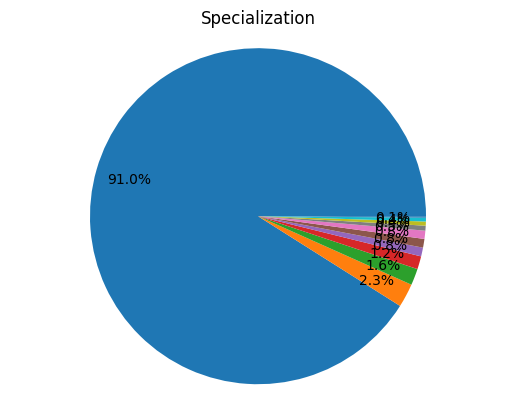

In [29]:
labels = ['Specialization Not Available','School of Engineering and Technology (SOET)','School of Liberal Arts and Culture Studies (SOLACS)','School of Business and Economics (SOBE)','School of Life Science and Biotechnology (SOLB)','School of Medical Sciences (SOMS) ','School of Basic and Applied Sciences (SOBAS)','School of Education (SOE)','School of Media and Communication (SOMC)','School of Law and Justice (SOLJ)','School of Smart Agriculture ']
sizes=[28770,722,501,395,268,264,249,150,125,115,45]
fig,ax= plt.subplots()
ax.pie(sizes,autopct='%1.1f%%', pctdistance=0.8)
ax.axis('equal')
ax.set_title('Specialization')
plt.show()

In [30]:
#Number of foreign students in the university

In [31]:
df['Country'].value_counts()

India         31597
Bangladesh        6
Zimbabwe          1
Name: Country, dtype: int64

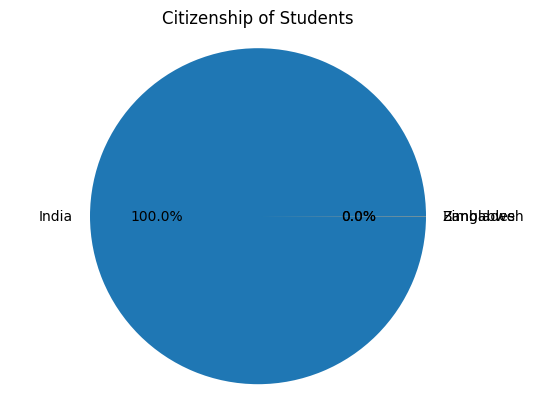

In [32]:
labels = ['India','Bangladesh','Zimbabwe']
sizes=[31597,6,1]
fig,ax= plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Citizenship of Students')
plt.show()

In [33]:
df['Submitted Applications'].value_counts()

0    31178
1      426
Name: Submitted Applications, dtype: int64

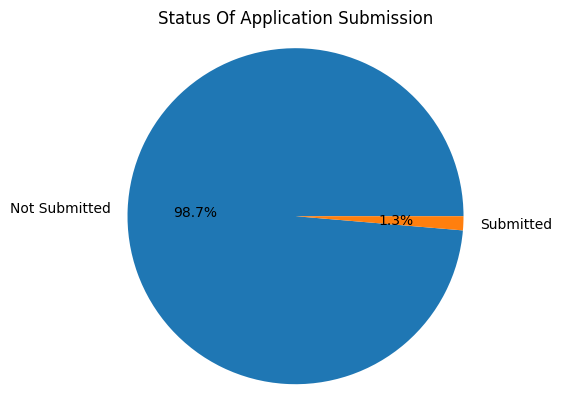

In [34]:
labels = ['Not Submitted','Submitted']
sizes=[31178,426]
fig,ax= plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Status Of Application Submission')
plt.show()

In [35]:
#Which courses receive the highest and lowest number of students' applications respectively?

In [36]:
df['Course'].value_counts()

B.Com (H)                                       2697
B.Ed                                            2355
BA LLB (Hons.)                                  1316
B.Pharm                                          988
BBA in Logistics and Supply Chain Management     898
                                                ... 
Civil Engineering                                  1
History                                            1
Biotechnology                                      1
Physics                                            1
Electrical Engineering                             1
Name: Course, Length: 127, dtype: int64

In [37]:
df['Lead Stage'].value_counts()

Disqualified          17446
NR Closed              5936
No Response            4139
Qualified              2884
Asked for Callback     1029
Untouched                99
PhD Enquiry              56
Sports Quota             15
Name: Lead Stage, dtype: int64

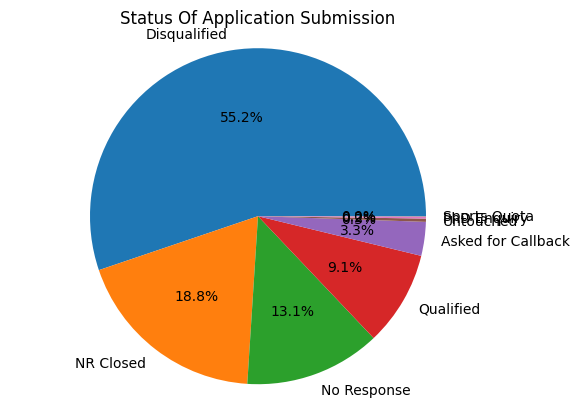

In [38]:
labels = ['Disqualified','NR Closed','No Response','Qualified','Asked for Callback','Untouched','PhD Enquiry','Sports Quota']
sizes=[17446,5936,4139,2884,1029,99,56,15]
fig,ax= plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.1f%%')
ax.axis('equal')
ax.set_title('Status Of Application Submission')
plt.show()

# Valuable Insights

In [39]:
# Variation of Submitted Application on the basis of different Specializations

In [40]:
ans1=df.groupby(df['Specialization'])['Submitted Applications'].value_counts()

In [41]:
ans1

Specialization                                       Submitted Applications
School of Basic and Applied Sciences (SOBAS)         0                           210
                                                     1                            39
School of Business and Economics (SOBE)              0                           330
                                                     1                            65
School of Education (SOE)                            0                           112
                                                     1                            38
School of Engineering and Technology (SOET)          0                           615
                                                     1                           107
School of Law and Justice (SOLJ)                     0                            98
                                                     1                            17
School of Liberal Arts and Culture Studies (SOLACS)  0                    

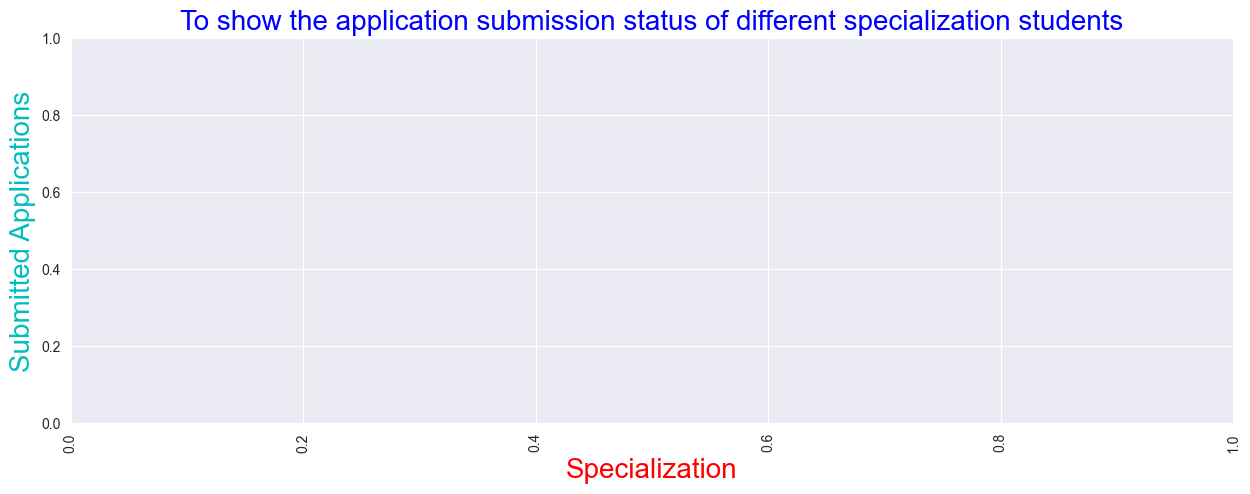

In [42]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.lineplot(df=ans1,linestyle='--',linewidth = 4, marker = 'o',markersize=10,markerfacecolor='red',markeredgecolor='black')
plt.xticks(rotation =90)
plt.title('To show the application submission status of different specialization students',fontsize=20,color='Blue')
plt.xlabel('Specialization',fontsize=20, color='red')
plt.ylabel('Submitted Applications',fontsize=20, color='c')
plt.show()

In [43]:
#Establishhing realationship between Lead Stage and Specialization 

In [44]:
ans2=df.groupby(df['Lead Stage'])['Specialization'].value_counts()

In [45]:
ans2

Lead Stage          Specialization                                     
Asked for Callback  Specialization Not Available                           944
                    School of Liberal Arts and Culture Studies (SOLACS)     19
                    School of Engineering and Technology (SOET)             16
                    School of Business and Economics (SOBE)                 11
                    School of Basic and Applied Sciences (SOBAS)             7
                                                                          ... 
Untouched           School of Business and Economics (SOBE)                  2
                    School of Liberal Arts and Culture Studies (SOLACS)      2
                    School of Life Science and Biotechnology (SOLB)          2
                    School of Media and Communication (SOMC)                 1
                    School of Smart Agriculture                              1
Name: Specialization, Length: 73, dtype: int64

In [46]:
#Faster mode for verification: API v/s online? 

In [47]:
ans3=df.groupby(df['Lead Origin'])['Lead Status'].value_counts()

In [48]:
ans3

Lead Origin  Lead Status
API          Unverified     27798
             Verified        3114
Online       Verified         687
             Unverified         5
Name: Lead Status, dtype: int64

In [49]:
#Variation of lead stage with enrolment Status: 

In [50]:
ans4=df.groupby(df['Lead Stage'])['Enrolment Status'].value_counts()

In [51]:
ans4

Lead Stage          Enrolment Status
Asked for Callback  No                   1028
                    Yes                     1
Disqualified        No                  17442
                    Yes                     4
NR Closed           No                   5934
                    Yes                     2
No Response         No                   4132
                    Yes                     7
PhD Enquiry         No                     56
Qualified           No                   2764
                    Yes                   120
Sports Quota        No                     15
Untouched           No                     98
                    Yes                     1
Name: Enrolment Status, dtype: int64

In [52]:
#number of students from sports quota got verified.

In [53]:
ans5=df.groupby(df['Lead Stage'])['Lead Status'].value_counts()

In [54]:
ans5
#(4)

Lead Stage          Lead Status
Asked for Callback  Unverified       911
                    Verified         118
Disqualified        Unverified     15732
                    Verified        1714
NR Closed           Unverified      5337
                    Verified         599
No Response         Unverified      3726
                    Verified         413
PhD Enquiry         Unverified        28
                    Verified          28
Qualified           Unverified      1970
                    Verified         914
Sports Quota        Unverified        11
                    Verified           4
Untouched           Unverified        88
                    Verified          11
Name: Lead Status, dtype: int64

In [55]:
#Specialization with highest and lowest number of PhD Scholars  

In [56]:
ans6=df.groupby(df['Campus'])['Specialization'].value_counts()

In [57]:
ans6 
#(Highest: School of Liberal Arts and Culture Studies (SOLACS))
#(Lowest:  School of Media and Communication (SOMC)  )

Campus  Specialization                                     
PG      Specialization Not Available                            5414
        School of Liberal Arts and Culture Studies (SOLACS)      140
        School of Business and Economics (SOBE)                  106
        School of Basic and Applied Sciences (SOBAS)              94
        School of Life Science and Biotechnology (SOLB)           83
        School of Engineering and Technology (SOET)               50
        School of Media and Communication (SOMC)                  30
        School of Medical Sciences (SOMS)                         30
        School of Law and Justice (SOLJ)                          11
        School of Education (SOE)                                 10
PhD     School of Liberal Arts and Culture Studies (SOLACS)       19
        School of Basic and Applied Sciences (SOBAS)               7
        School of Engineering and Technology (SOET)                6
        School of Business and Economics (S

In [58]:
#Students disqualified even after completing mobile verification 

In [59]:
ans7=df.groupby(df['Lead Stage'])['Mobile Verification Status'].value_counts()

In [60]:
ans7
#(1523)

Lead Stage          Mobile Verification Status
Asked for Callback  No                              919
                    Yes                             110
Disqualified        No                            15923
                    Yes                            1523
NR Closed           No                             5403
                    Yes                             533
No Response         No                             3768
                    Yes                             371
PhD Enquiry         No                               29
                    Yes                              27
Qualified           No                             2013
                    Yes                             871
Sports Quota        No                               11
                    Yes                               4
Untouched           No                               88
                    Yes                              11
Name: Mobile Verification Status, dtype: int64

In [61]:
#Foreigner students who started applications in the university

In [62]:
ans8=df.groupby(df['Country'])['Form Initiated'].value_counts()

In [63]:
ans8
#(4)

Country     Form Initiated
Bangladesh  1                     3
            0                     2
            2                     1
India       0                 30331
            1                  1255
            2                    11
Zimbabwe    0                     1
Name: Form Initiated, dtype: int64

In [64]:
#Number of PG students who were disqualified even after completing enrolment status?

In [65]:
ans9=df.groupby(df['Lead Stage'])['Enrolment Status'].value_counts()

In [66]:
ans9
#(4)

Lead Stage          Enrolment Status
Asked for Callback  No                   1028
                    Yes                     1
Disqualified        No                  17442
                    Yes                     4
NR Closed           No                   5934
                    Yes                     2
No Response         No                   4132
                    Yes                     7
PhD Enquiry         No                     56
Qualified           No                   2764
                    Yes                   120
Sports Quota        No                     15
Untouched           No                     98
                    Yes                     1
Name: Enrolment Status, dtype: int64

In [67]:
#Seat availability in different specialization for each degree offered by the institution

In [68]:
ans10=df.groupby(df['Specialization'])['Campus'].value_counts()

In [69]:
ans10

Specialization                                       Campus
School of Basic and Applied Sciences (SOBAS)         UG          148
                                                     PG           94
                                                     PhD           7
School of Business and Economics (SOBE)              UG          284
                                                     PG          106
                                                     PhD           5
School of Education (SOE)                            UG          138
                                                     PG           10
                                                     PhD           2
School of Engineering and Technology (SOET)          UG          666
                                                     PG           50
                                                     PhD           6
School of Law and Justice (SOLJ)                     UG          101
                                           